In [1]:
#1. Import Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
#2. Load the Dataset:
url = "https://drive.google.com/uc?id=11Iq7YvbWZbt8VXjfm06brx66b10YiwK-"
df = pd.read_csv(url)


In [9]:
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

  Cluster  
0       1  
1       1  
2       1  
3       1  
4       1  


In [3]:
#3. Data Preprocessing:
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:, :-1])  # Exclude the target variable (class)


In [4]:
pip install --upgrade scikit-learn numpy threadpoolctl


  Using cached numpy-1.26.0-cp39-cp39-win_amd64.whl (15.8 MB)
Note: you may need to restart the kernel to use updated packages.


C:\Users\athir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\athir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\athir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\athir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Window

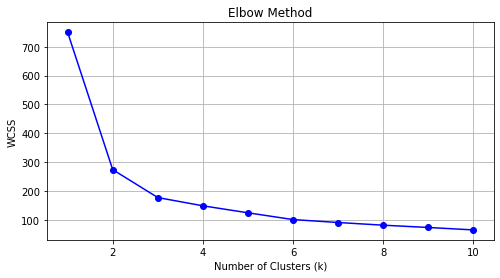

In [6]:
#4. Determine the Optimal Number of Clusters (K):
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Assuming X contains your data

wcss = []

# Try different values of k (number of clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    
    # Calculate the WCSS for this k
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [7]:
#Apply K-Means Clustering:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)


C:\Users\athir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=0)

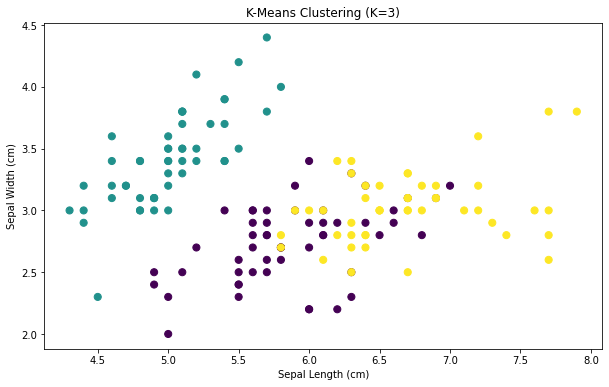

In [11]:
#Visualize the Clusters:
df['Cluster'] = kmeans.labels_
df['Cluster'] = df['Cluster'].astype('category')

plt.figure(figsize=(10, 6))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Cluster'], s=50, cmap='viridis')
plt.title('K-Means Clustering (K=3)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()
